In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch

# Load data from CSV file
df = pd.read_csv('C:\\Users\\USER\\Documents\\Football Analytics\\IKD_REMO_B.csv')
df

,Match,Player from,Action,x,y,Minute,Second,player to,xEnd,yEnd,Half,Field Side
0,Ikorodu City vs Remo Stars B,Tosin Oyedekun,Chance Set Piece,72,72,0,25,NaN,0,0,1,L
1,Ikorodu City vs Remo Stars B,Harrison Uzondu,Intervention,25,95,1,54,NaN,0,0,1,L
2,Ikorodu City vs Remo Stars B,Harrison Uzondu,Intervention,3,91,2,15,NaN,0,0,1,L
3,Ikorodu City vs Remo Stars B,Tosin Oyedekun,Foul Received,40,89,2,37,NaN,0,0,1,L
4,Ikorodu City vs Remo Stars B,Farouq Farouq,Loss,50,50,2,56,NaN,0,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...
249,Ikorodu City vs Remo Stars B,Yusuf Rauf,Save,2,42,85,29,NaN,0,0,2,R
250,Ikorodu City vs Remo Stars B,Yusuf Rauf,Shot Against,22,56,85,46,NaN,0,0,2,R
251,Ikorodu City vs Remo Stars B,Harrison Uzondu,Successful Shot Pass,74,91,86,11,Farouq Farouq,73,72,2,R
252,Ikorodu City vs Remo Stars B,Farouq Farouq,Successful Key Pass,74,66,86,38,Tosin Oyedekun,83,49,2,R


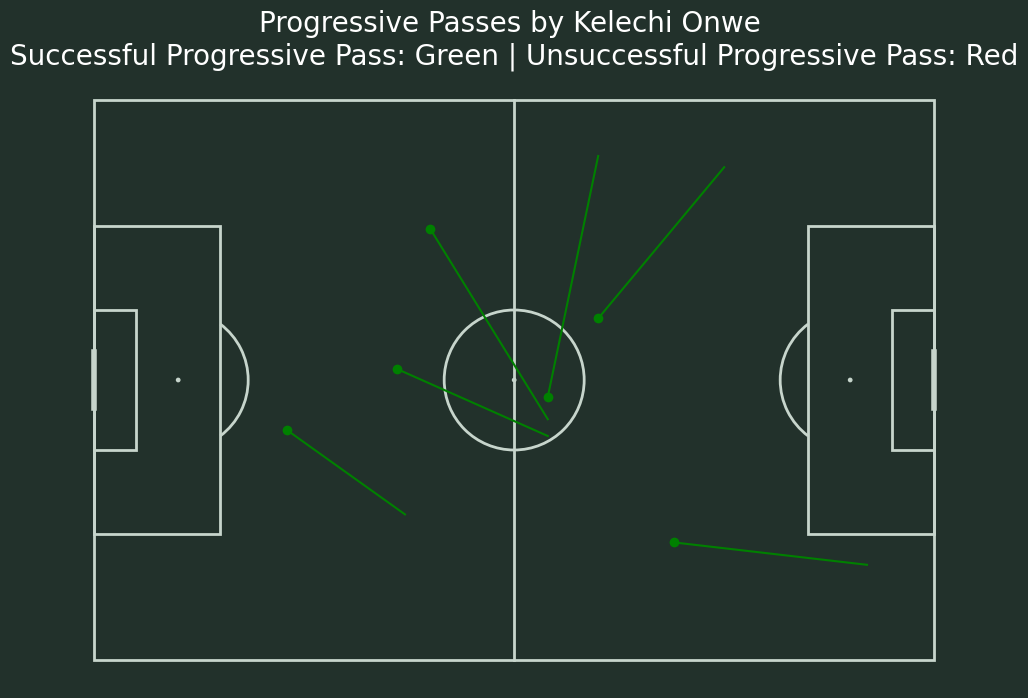

In [2]:
#plotting Kelechin Onwe's progreesive pass data

fig, ax = plt.subplots(figsize=(13.5, 8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

# Define the pitch type
pitch_type = 'statsbomb'  # or 'opta'

# Create the pitch based on the type
pitch = Pitch(
    pitch_type=pitch_type,
    orientation='horizontal',
    pitch_color='#22312b',
    line_color='#c7d5cc',
    figsize=(13, 8),
    constrained_layout=False,
    tight_layout=True
)

# Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)

# Conditionally invert the y-axis based on pitch type
if pitch_type == 'statsbomb':
    plt.gca().invert_yaxis()  # Only invert for statsbomb pitch type
    
# Adjust coordinates based on pitch type
x_scale = 1.2 if pitch_type == 'statsbomb' else 1
y_scale = 0.8 if pitch_type == 'statsbomb' else 1

# Plot each pass with the corrected condition
for i in range(len(df['x'])):
    x_start = df['x'].iloc[i] * x_scale
    y_start = df['y'].iloc[i] * y_scale
    x_end = df['xEnd'].iloc[i] * x_scale
    y_end = df['yEnd'].iloc[i] * y_scale
    
    if df['Action'].iloc[i] == 'Successful Progressive Pass' and df['Player from'].iloc[i] == 'Kelechi Onwe':
        plt.plot((x_start, x_end), (y_start, y_end), color='green')
        plt.scatter(x_start, y_start, color='green')
    elif df['Action'].iloc[i] == 'Unsuccessful Progressive Pass' and df['Player from'].iloc[i] == 'Kelechi Onwe':
        plt.plot((x_start, x_end), (y_start, y_end), color='red')
        plt.scatter(x_start, y_start, color='red')

plt.title(
    'Progressive Passes by Kelechi Onwe \nSuccessful Progressive Pass: Green | Unsuccessful Progressive Pass: Red',
    color='white', size=20
)
plt.show()


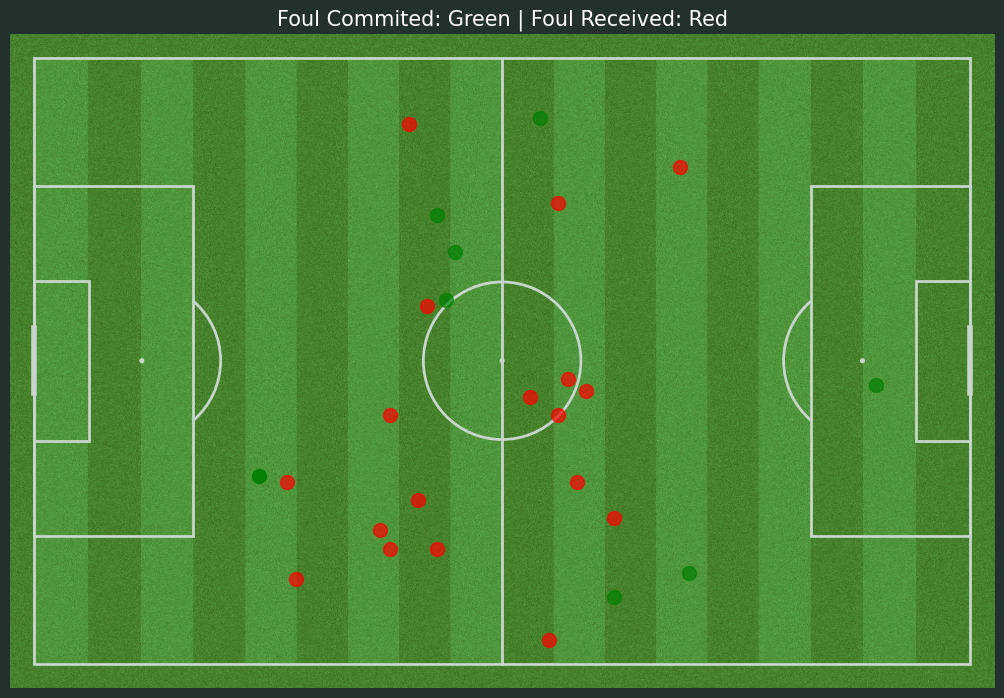

In [8]:
#plotting fouls recived and committed

text_color = 'white'  
fouls = ['Foul Committed', 'Foul Received']

fouls_df = df[df['Action'].isin(fouls)]
fouls_df



fig, ax = plt.subplots(figsize=(13,8.5))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='opta', orientation='vertical',
              pitch_color='grass', stripe=True, line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)

fouls_committed = fouls_df[fouls_df['Action'] == 'Foul Committed']
fouls_received = fouls_df[fouls_df['Action'] == 'Foul Received']

plt.scatter(fouls_committed['x'], fouls_committed['y'], s=100, c='green', alpha=.7, label='Foul Committed')
plt.scatter(fouls_received['x'], fouls_received['y'], s=100, c='red', alpha=.7, label='Foul Received')


# Add text to the figure 
plt.title('Foul Commited: Green | Foul Received: Red', 
          color='white', size=15)


plt.show()